In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

sdf = pd.read_csv('../data/sample_data.csv', index_col = 0)

In [ ]:
ndt = np.array(sdf)
dt = 100*(np.log(ndt[1:,:])-np.log(ndt[:-1,:]))
dt = pd.DataFrame(dt, index=sdf.iloc[1:,:].index, columns=sdf.columns.str[:-6])
display(dt)

,AAPL,ABC,ABIO,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WM,WMB,WMT,WY,XEL,XOM,XRAY,XRX,YUM,ZION
2002/4/2,-1.607440,-0.521959,-2.672306,-4.842094,-5.433252,-0.071055,-0.965385,-2.481649,0.071126,1.153808,...,-2.222292,1.752913,-1.063457,-0.857179,1.650298,1.247015,-0.575564,-3.489754,1.094754,-0.287957
2002/4/3,-1.338501,-1.745013,-13.353139,-0.077533,-2.796167,-2.373363,-3.044086,-4.439147,0.023701,-0.043299,...,-0.112374,-4.614558,-0.561517,0.275740,0.233571,-1.566944,-1.050065,-0.093503,-0.974458,-1.728488
2002/4/4,4.728711,-0.103632,-2.409755,-0.935316,1.151158,3.010988,0.000000,0.436832,0.354836,2.078727,...,-0.150096,-0.564917,1.153726,-1.222177,0.531260,-1.243680,2.170728,1.208770,0.496927,-1.355625
2002/4/5,-0.644705,-2.185677,-0.244197,-1.155188,-0.187008,-0.993623,0.362955,-1.293022,-0.426011,-0.702365,...,-1.399196,-2.514956,-0.236445,1.448735,-2.021939,-1.212426,-0.272157,-2.811821,1.105009,0.314460
2002/4/8,-0.730297,1.546915,2.415576,2.580626,0.116990,1.627197,1.313791,1.224163,0.685346,0.638722,...,0.076111,0.223107,1.076343,-0.778766,-0.361035,1.420770,4.137757,-1.147248,1.426818,0.833764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,0.827129,3.566468,2.433210,1.602269,-0.933345,1.950772,0.238462,-0.458441,4.167016,4.218381,...,2.464412,1.542811,0.814314,0.844488,3.476995,0.115971,1.324167,0.479612,0.117414,2.872725
2023/3/27,-1.236949,0.178855,-0.481929,-0.483886,-1.567985,1.477092,0.107352,-0.736901,-0.059517,-0.607965,...,-0.571359,0.658924,1.657551,0.559051,-0.397436,2.168913,0.748857,2.564244,0.359200,3.751743
2023/3/28,-0.398826,0.832569,-1.951281,0.066975,-0.635232,1.023685,-0.098017,-0.747438,0.688187,0.428215,...,0.804158,-0.207609,-0.389185,-0.980403,0.168339,1.239918,0.584490,-2.427633,0.163563,2.091847
2023/3/29,1.959745,0.612048,-0.990107,1.530808,2.988656,0.558583,2.649619,0.953517,1.688400,1.307060,...,1.423731,1.376007,0.430792,2.261359,1.728100,1.703110,-0.079489,1.624955,-0.070060,3.574737


In [ ]:
import pickle

with open(f'../weights/weights_proposed1/proposed1_40.pkl', 'rb') as f:
    W_sar = pickle.load(f)
W_sar = W_sar.detach()
W_sar.requires_grad_(False)
#W_sar = W_sar/W_sar.sum(dim=1).unsqueeze(1)


tensor([[ 0.0000e+00, -8.8471e-04,  8.9633e-06,  ..., -5.6726e-04,
          7.2435e-05,  1.2057e-04],
        [-3.8845e-04,  0.0000e+00,  3.3804e-05,  ...,  9.8682e-04,
          2.1317e-04, -1.2595e-03],
        [ 7.5297e-05, -4.6130e-04,  0.0000e+00,  ...,  4.3851e-04,
         -7.6868e-05,  1.3023e-03],
        ...,
        [-1.2825e-03,  4.0075e-04, -3.1753e-03,  ...,  0.0000e+00,
         -8.6520e-04, -1.3461e-04],
        [-8.5514e-04, -1.0057e-03,  9.5764e-04,  ...,  4.3185e-04,
          0.0000e+00,  7.5887e-04],
        [ 1.0597e-04, -1.1044e-03, -8.1290e-04,  ...,  1.9281e-04,
         -2.6742e-04,  0.0000e+00]])

In [ ]:
colname = [name for name in dt.columns.tolist()]
#W_pd = pd.DataFrame(W_sar/torch.abs(W_sar.sum(dim=1)).unsqueeze(1), columns=colname, index=colname)
W_pd = pd.DataFrame(W_sar.numpy(), columns=colname, index=colname)

In [ ]:
def mask_top_n(df, n):
    # 各行の値の順位を計算（降順）
    ranks = df.apply(lambda x: x.rank(method='min', ascending=False), axis=1)
    # top N の条件に該当する位置は元の値を保持し、それ以外は 0
    return df.where(ranks <= n, 0)

In [ ]:
W_pd = mask_top_n(W_pd, 5)

In [ ]:
# Tech
threshold = 0.05
tech_list = [
    'AAPL',
    'ADBE',
    'ADI',
    'ADSK',
    'AMAT',
    'AMD',
    'ANSS',
    'AKAM',
    'CSCO',
    'MSFT',
    'ORCL',
    'TXN',
    'NVDA',
    'AMZN'
]

soft_list = [
    'ADBE',
    'ADSK',
    'ANSS',
    'CSCO',
    'ORCL',
]

semc_list = [
    'ADI',
    'AMAT',
    'AMD',
    'TXN',
    'NVDA'
]

W_tech = W_pd.loc[tech_list, tech_list]
W_tech = W_tech*(np.abs(W_tech)>threshold)
W_tech

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AKAM,CSCO,MSFT,ORCL,TXN,NVDA,AMZN
AAPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.000000,0.000000,-0.000000,0.0,0.000000,0.000000,0.126739
ADBE,0.000000,0.000000,0.000000,0.080192,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.064774,0.000000
ADI,-0.000000,0.000000,0.000000,0.000000,0.076156,0.0,-0.000000,-0.000000,0.000000,-0.000000,0.0,0.173628,0.000000,0.000000
ADSK,0.000000,0.137408,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.060297,-0.0,0.000000,0.000000,0.000000
AMAT,-0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.000000,0.000000,0.000000,0.000000,-0.0,-0.000000,0.070724,0.000000
AMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.221135,-0.000000
ANSS,0.000000,0.088094,-0.000000,0.076061,0.000000,0.0,0.000000,0.058311,0.000000,0.000000,0.0,0.000000,0.000000,-0.000000
AKAM,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.000000,0.083210,-0.000000
CSCO,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.0,0.000000,0.000000,0.000000,0.102945,0.0,0.000000,0.000000,0.000000
MSFT,0.076782,0.133584,-0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


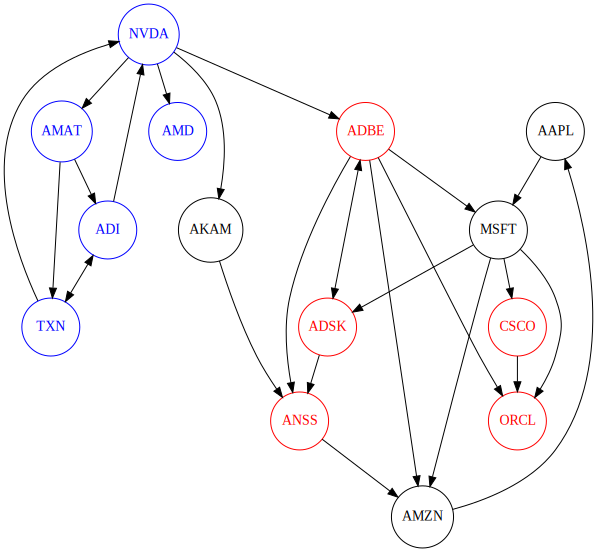

In [ ]:
from graphviz import Digraph

G = Digraph(format="png")
G.attr("node", shape="circle")
for node_name in tech_list:
    col = 'black'
    if node_name in soft_list:col='red'
    if node_name in semc_list:col='blue'
    G.node(node_name, width="0.8", color=col, fontcolor=col)
for i in range(14):
    for j in range(14):
        if W_tech.iloc[i,j] != 0 and W_tech.iloc[j,i] != 0:
            if i > j:
                col = 'black'
                G.edge(tech_list[j], tech_list[i], color=col, fontcolor=col, dir='both')
        elif W_tech.iloc[i,j] != 0:
            col = 'black'
            G.edge(tech_list[j], tech_list[i], color=col, fontcolor=col)
G